<a href="https://colab.research.google.com/github/saarangmahun/comp215/blob/main/labs/lab05_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 5
----------------
#### Name(s):
#### Date:

By the end of this lab you should be able to:
  * apply both a direct (ie. brute force) and heuristic algorithm to a problem
  * use the networkx module to visualize graphs
  * measure algorithm scaling


During this lab, you will be introduced to the following:
  * seeding the random module



## The Traveling Salesperson Problem

This lab is based on the famous Traveling Salesperson Problem (TSP) outlined in Section 3.3.2 of 'On Complexity'.  Imagine you needed to travel to ten different cities.  What is the sortest possible route you could take to visit every city?  For our version of the problem, you start from a specific city and must end on the same city.

In this lab, you will implement a direct (ie. brute force) and a heuristic solution to the problem.

In [ ]:
# start with some imports
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

## Set up the map

For this implementation of the problem we will randomly place N cities on a 100 by 100 grid.  Cities will be labelled using a single character; 'A', 'B', 'C', etc.  City locations will be denoted by a 2-tuple, `(x,y)`, giving their position on the grid. In order to create reproducable maps, we will use [random.seed()](https://docs.python.org/3/library/random.html#random.seed) to initialize the random module.  

In [ ]:
def setup_map(N, seed=1):
  ''' Returns a map of N cities with random locations on a 100 by 100 grid '''
  random.seed(seed)
  city_locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(N)]
  city_names = [chr(65 + i) for i in range(N)]
  city_map = dict(zip(city_names, city_locations))
  return city_map

def graph_map(city_map):
  ''' graph the map of cities using networkx'''
  G = nx.Graph()
  G.add_nodes_from(city_map)
  nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
  ''' Returns the distance between two cities on a map'''
  x1, y1 = city_map[city1]
  x2, y2 = city_map[city2]
  return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),1)

def calculate_distances(city_map):
  ''' Returns a dictionary with the distances between all pairs of cities in a map '''
  distances = {}
  for city1 in city_map:
      for city2 in city_map:
          if city1 != city2:
              # this will have duplicate distances (A,B) and (B,A)
              # these duplicates make the algorithm implememntation simpler
              distances[(city1, city2)] = distance(city1, city2, city_map)
  return distances


In [ ]:
# test our setup functions
city_map = setup_map(10)
print(f'City Map: {city_map}')
distances = calculate_distances(city_map)
print(f'Distances between cities: {distances}')
graph_map(city_map)

### Exercise 1: The Brute Force Solution

Implement a brute force solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the brute force solution looks something like this:
 1. Loop over every possible route that starts and ends on city A.  For a three city example, this would be ABCA, ACBA.  
 2. Calculate the total distance of each possible route.  
 3. Find the route with the minimum total distance.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

City Map:
{'A': (81, 14),
 'B': (3, 94),
 'C': (35, 31),
 'D': (28, 17),
 'E': (94, 13),
 'F': (86, 94),
 'G': (69, 11),
 'H': (75, 54),
 'I': (4, 3),
 'J': (11, 27)}

Distances between some city pairs:
('A', 'B'): 111.7
('A', 'C'): 49.0
('A', 'D'): 53.1
('A', 'E'): 13.0
('A', 'F'): 80.2

Brute Force TSP Solution:
Best Route: A -> E -> H -> F -> B -> J -> I -> D -> C -> G -> A
Total Distance: 370.49999999999994
Time Taken: 1.0836 seconds


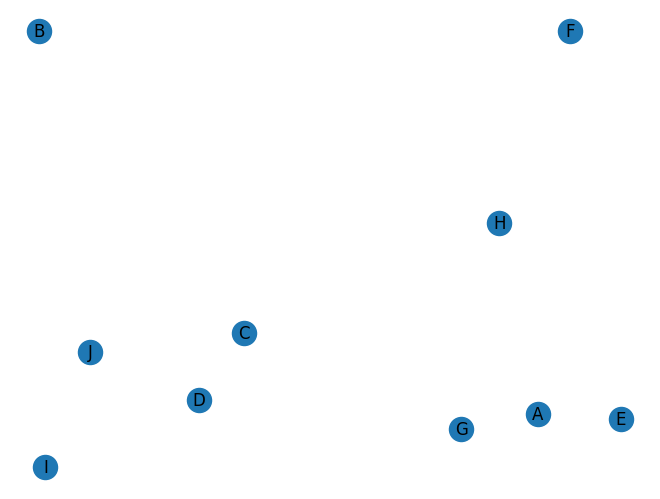

In [3]:
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

def setup_map(N, seed=1):

    random.seed(seed)
    city_locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(N)]
    city_names = [chr(65 + i) for i in range(N)]
    city_map = dict(zip(city_names, city_locations))
    return city_map

def graph_map(city_map):
    ''' Graph the map of cities using networkx '''
    G = nx.Graph()
    G.add_nodes_from(city_map)
    nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
    ''' Returns the Euclidean distance between two cities on a map '''
    x1, y1 = city_map[city1]
    x2, y2 = city_map[city2]
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2), 1)

def calculate_distances(city_map):
    ''' Returns a dictionary with distances between all pairs of cities in a map '''
    distances = {}
    for city1 in city_map:
        for city2 in city_map:
            if city1 != city2:
                distances[(city1, city2)] = distance(city1, city2, city_map)
    return distances

def brute_force_tsp(city_map, distances, start='A'):
    # List of cities excluding the starting city
    cities = list(city_map.keys())
    cities.remove(start)

    best_route = None
    best_distance = float('inf')

    for perm in itertools.permutations(cities):
        route = (start,) + perm + (start,)
        total_distance = 0

        for i in range(len(route)-1):
            leg = (route[i], route[i+1])
            total_distance += distances[leg]

        if total_distance < best_distance:
            best_distance = total_distance
            best_route = route

    return best_route, best_distance

# Testing the Brute Force

# Set up a city map and compute distances.
city_map = setup_map(10, seed=42)  # Change seed or number of cities here.
distances = calculate_distances(city_map)

print("City Map:")
pprint(city_map)

print("\nDistances between some city pairs:")
for key in list(distances.keys())[:5]:
    print(f"{key}: {distances[key]}")

# Graph the city map
graph_map(city_map)

# Run the brute force algorithm.
start_time = time.time()
best_route, best_distance = brute_force_tsp(city_map, distances, start='A')
end_time = time.time()

print("\nBrute Force TSP Solution:")
print("Best Route:", " -> ".join(best_route))
print("Total Distance:", best_distance)
print("Time Taken: {:.4f} seconds".format(end_time - start_time))


### Exercise 2: Nearest Neighbour

Implement a nearest neighbour solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the nearest neighbour solution looks something like this:
 1. Start from the starting city.  
 2. Go to the nearest city that has not been visited.  
 3. Repeat steps 1 and 2 until all cities have been visited.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

{'A': (81, 14),
 'B': (3, 94),
 'C': (35, 31),
 'D': (28, 17),
 'E': (94, 13),
 'F': (86, 94),
 'G': (69, 11),
 'H': (75, 54),
 'I': (4, 3),
 'J': (11, 27)}

Nearest Neighbour TSP Solution:
Route: A -> G -> E -> H -> F -> C -> D -> J -> I -> B -> A
Total Distance: 468.4
Time Taken: 0.0002 seconds


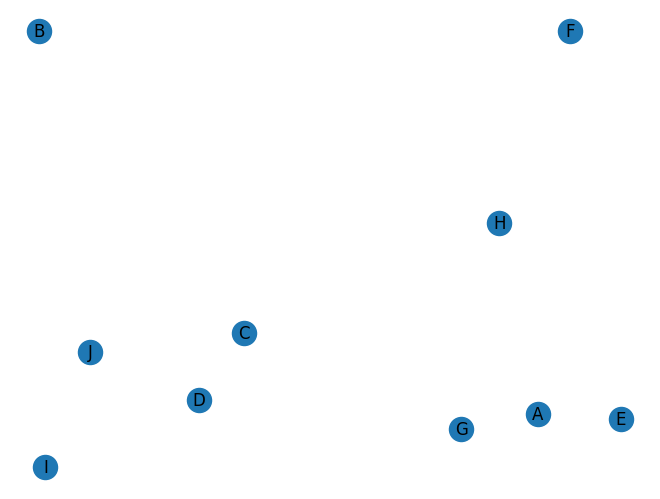

In [4]:
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

def setup_map(N, seed=1):
    random.seed(seed)
    city_locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(N)]
    city_names = [chr(65 + i) for i in range(N)]
    return dict(zip(city_names, city_locations))

def graph_map(city_map):
    G = nx.Graph()
    G.add_nodes_from(city_map)
    nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
    x1, y1 = city_map[city1]
    x2, y2 = city_map[city2]
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2), 1)

def calculate_distances(city_map):
    distances = {}
    for city1 in city_map:
        for city2 in city_map:
            if city1 != city2:
                distances[(city1, city2)] = distance(city1, city2, city_map)
    return distances

def nearest_neighbor_tsp(city_map, distances, start='A'):
    current_city = start
    visited = {start}
    route = [start]
    while len(visited) < len(city_map):
        unvisited = [city for city in city_map if city not in visited]
        next_city = min(unvisited, key=lambda city: distances[(current_city, city)])
        route.append(next_city)
        visited.add(next_city)
        current_city = next_city
    route.append(start)
    total_distance = sum(distances[(route[i], route[i+1])] for i in range(len(route)-1))
    return route, total_distance

city_map = setup_map(10, seed=42)
distances = calculate_distances(city_map)
pprint(city_map)
graph_map(city_map)

start_time = time.time()
route, total_distance = nearest_neighbor_tsp(city_map, distances, start='A')
end_time = time.time()

print("\nNearest Neighbour TSP Solution:")
print("Route:", " -> ".join(route))
print("Total Distance:", total_distance)
print("Time Taken: {:.4f} seconds".format(end_time - start_time))


### Exercise 3: Graph the Routes

Use the networkx module to create directed graphs of the routes (brute force and nearest neighbour).  Include the distances between the cities on the edges.  Run several different map setups with a different sizes (ie. number of cities).  Do the brute force (ie. direct) and nearest neighbour (ie. heuristic) algorithms always give the same solution?  Do you notice anything about the brute force solutions that suggests an alternative heuristic algorithm?


Map with 5 cities:
{'A': (81, 14), 'B': (3, 94), 'C': (35, 31), 'D': (28, 17), 'E': (94, 13)}

Brute force solution:
Route: A -> D -> C -> B -> E -> A
Distance: 274.3


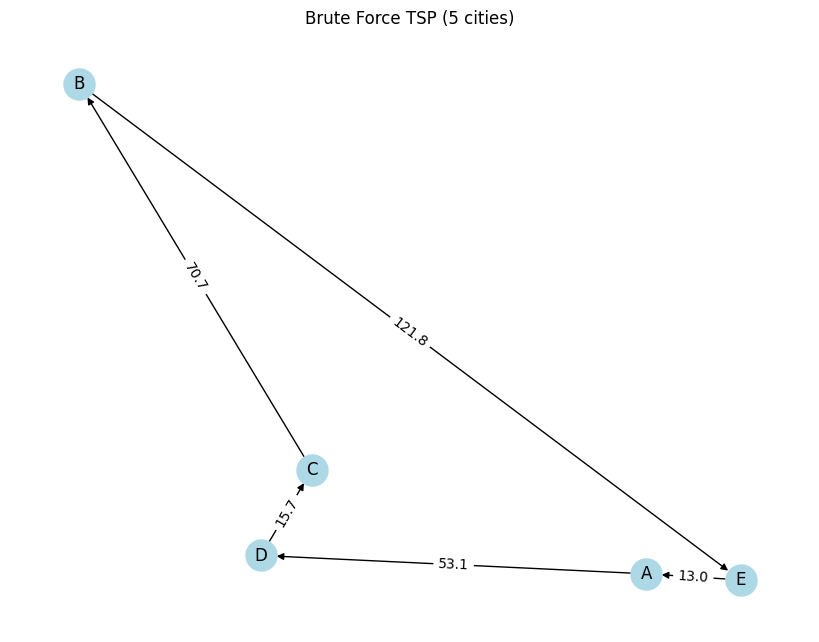


Nearest neighbour solution:
Route: A -> E -> C -> D -> B -> A
Distance: 283.1


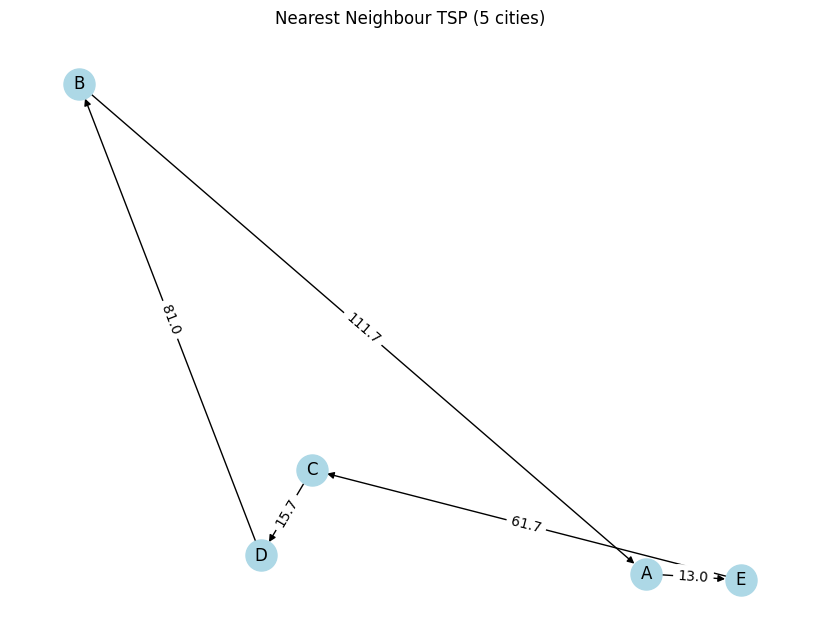



Map with 7 cities:
{'A': (81, 14),
 'B': (3, 94),
 'C': (35, 31),
 'D': (28, 17),
 'E': (94, 13),
 'F': (86, 94),
 'G': (69, 11)}

Brute force solution:
Route: A -> E -> F -> B -> C -> D -> G -> A
Distance: 317.59999999999997


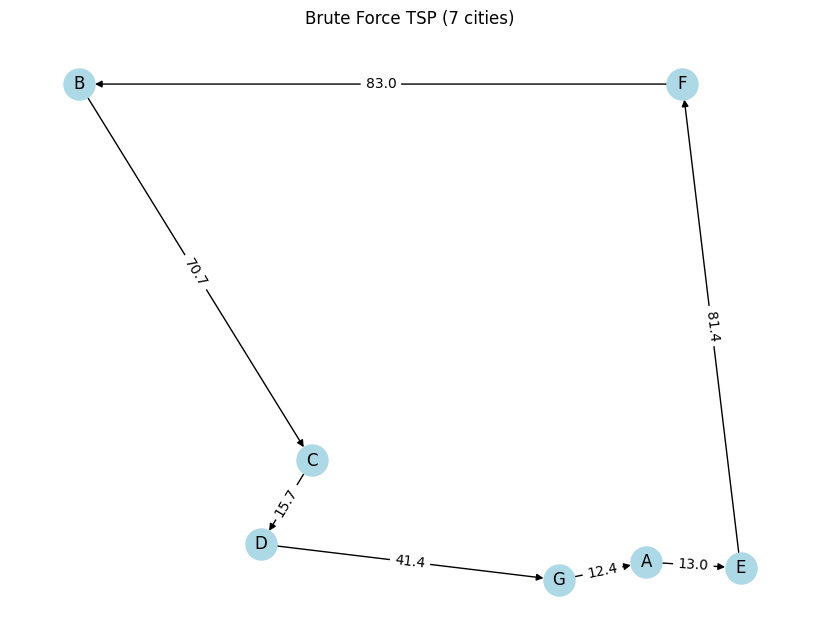


Nearest neighbour solution:
Route: A -> G -> E -> C -> D -> B -> F -> A
Distance: 359.09999999999997


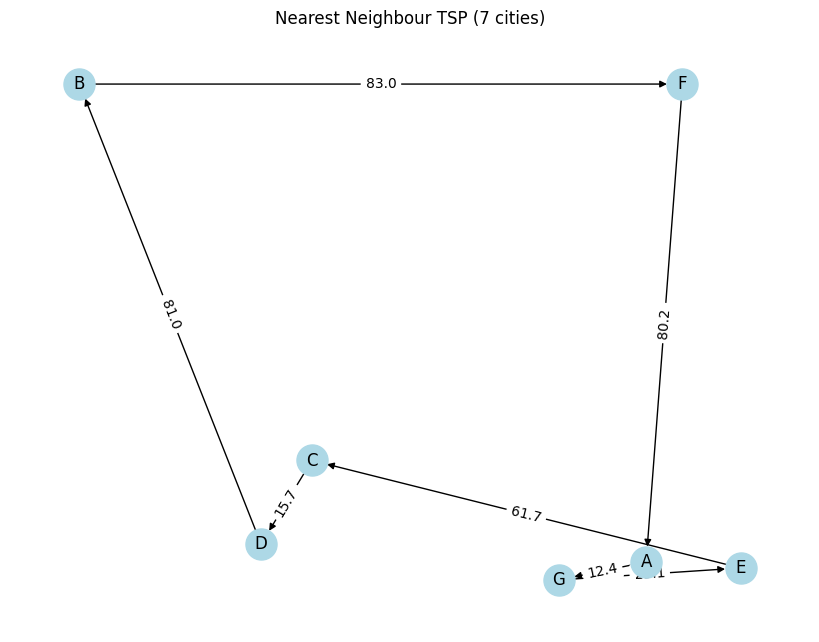



Map with 10 cities:
{'A': (81, 14),
 'B': (3, 94),
 'C': (35, 31),
 'D': (28, 17),
 'E': (94, 13),
 'F': (86, 94),
 'G': (69, 11),
 'H': (75, 54),
 'I': (4, 3),
 'J': (11, 27)}

Nearest neighbour solution:
Route: A -> G -> E -> H -> F -> C -> D -> J -> I -> B -> A
Distance: 468.4


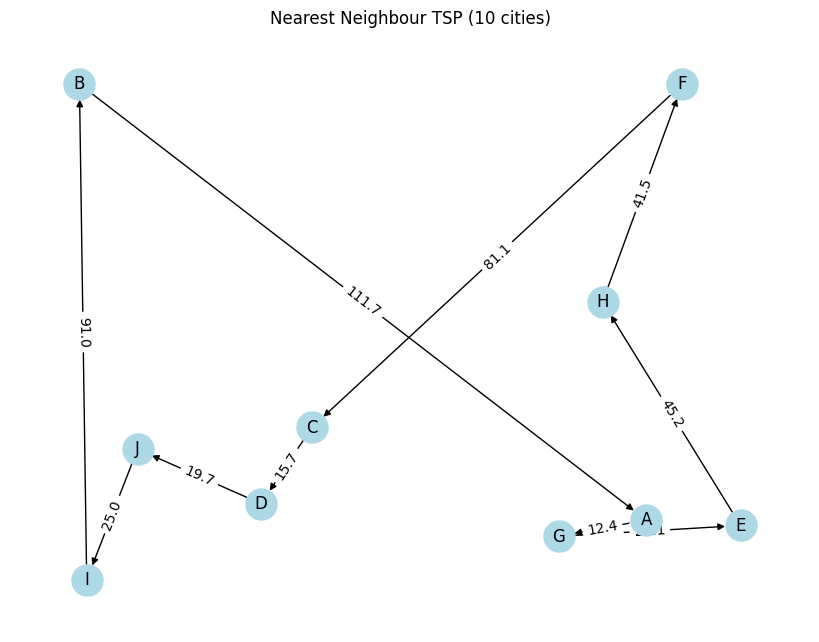



Observations:
1. The brute force (optimal) and nearest neighbour (heuristic) methods do not always yield the same route.
2. The brute force solution always finds the optimal route, while the nearest neighbour approach can be suboptimal.
3. Notice that each route has a mirror image (reverse order) with the same distance. This symmetry suggests that you could halve the search space in a brute force approach or consider running the heuristic in both directions.


In [5]:
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

def setup_map(N, seed=1):
    random.seed(seed)
    locs = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(N)]
    names = [chr(65 + i) for i in range(N)]
    return dict(zip(names, locs))

def distance(city1, city2, city_map):
    x1, y1 = city_map[city1]
    x2, y2 = city_map[city2]
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2), 1)

def calculate_distances(city_map):
    d = {}
    for c1 in city_map:
        for c2 in city_map:
            if c1 != c2:
                d[(c1, c2)] = distance(c1, c2, city_map)
    return d

def brute_force_tsp(city_map, distances, start='A'):
    cities = list(city_map.keys())
    cities.remove(start)
    best_route, best_dist = None, float('inf')
    for perm in itertools.permutations(cities):
        route = (start,) + perm + (start,)
        total = sum(distances[(route[i], route[i+1])] for i in range(len(route)-1))
        if total < best_dist:
            best_dist, best_route = total, route
    return best_route, best_dist

def nearest_neighbor_tsp(city_map, distances, start='A'):
    current, visited, route = start, {start}, [start]
    while len(visited) < len(city_map):
        unvisited = [c for c in city_map if c not in visited]
        next_city = min(unvisited, key=lambda c: distances[(current, c)])
        route.append(next_city)
        visited.add(next_city)
        current = next_city
    route.append(start)
    total = sum(distances[(route[i], route[i+1])] for i in range(len(route)-1))
    return route, total

def graph_route(route, city_map, distances, title="Route"):
    G = nx.DiGraph()
    for i in range(len(route)-1):
        c1, c2 = route[i], route[i+1]
        G.add_edge(c1, c2)
    pos = city_map
    edge_labels = {(route[i], route[i+1]): distances[(route[i], route[i+1])] for i in range(len(route)-1)}
    plt.figure(figsize=(8,6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.show()

# Try different map sizes
for N in [5, 7, 10]:
    print("Map with", N, "cities:")
    city_map = setup_map(N, seed=42)
    distances = calculate_distances(city_map)
    pprint(city_map)

    if N <= 8:  # Brute force is plausible only for small N.
        bf_route, bf_distance = brute_force_tsp(city_map, distances, start='A')
        print("\nBrute force solution:")
        print("Route:", " -> ".join(bf_route))
        print("Distance:", bf_distance)
        graph_route(bf_route, city_map, distances, title="Brute Force TSP ({} cities)".format(N))

    nn_route, nn_distance = nearest_neighbor_tsp(city_map, distances, start='A')
    print("\nNearest neighbour solution:")
    print("Route:", " -> ".join(nn_route))
    print("Distance:", nn_distance)
    graph_route(nn_route, city_map, distances, title="Nearest Neighbour TSP ({} cities)".format(N))
    print("\n" + "="*50 + "\n")

# Observations:
# 1. The brute force (optimal) and nearest neighbour (heuristic) methods do not always result in the same route.
# 2. The brute force solution always finds the optimal route, while the nearest neighbour approach can be suboptimal.
# 3. Notice that each route has a mirror image (reverse order) with the same distance. This symmetry suggests that you could halve the search space in a brute force approach or consider running the heuristic in both directions.


### Exercise 4: Algorithm Scaling

Use the `time` module to measure the running time of the two algorithms.  Note that the `time.time()` function returns the current time, so calling it before and after the algorithm has run can give you the time it takes for the algorithm to execute.  Taking the average over several trials will make the measurement more precise.  Demonstrate the scaling nature of the algorithms by plotting their execution time as a function of N, up to about N = 10.  

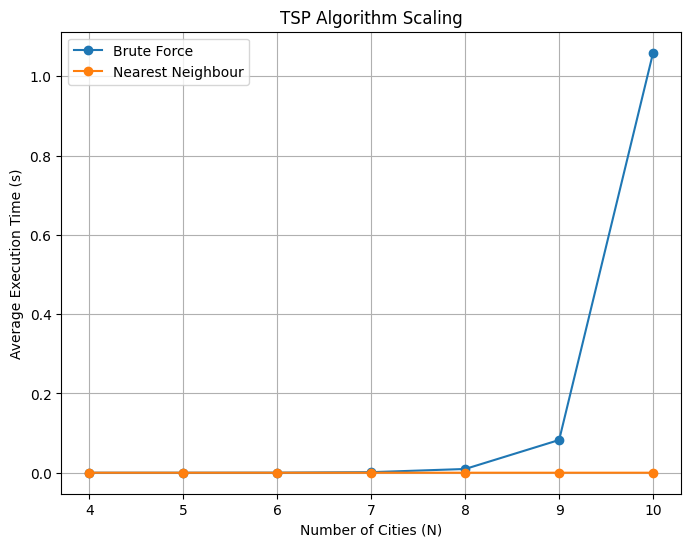

In [6]:
import random, math, time, itertools
import matplotlib.pyplot as plt
%matplotlib inline

def setup_map(N, seed=1):
    random.seed(seed)
    locs = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(N)]
    names = [chr(65 + i) for i in range(N)]
    return dict(zip(names, locs))

def distance(c1, c2, city_map):
    x1, y1 = city_map[c1]
    x2, y2 = city_map[c2]
    return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2), 1)

def calculate_distances(city_map):
    d = {}
    for c1 in city_map:
        for c2 in city_map:
            if c1 != c2:
                d[(c1, c2)] = distance(c1, c2, city_map)
    return d

def brute_force_tsp(city_map, distances, start='A'):
    cities = list(city_map.keys())
    cities.remove(start)
    best_route, best_dist = None, float('inf')
    for perm in itertools.permutations(cities):
        route = (start,) + perm + (start,)
        total = sum(distances[(route[i], route[i+1])] for i in range(len(route)-1))
        if total < best_dist:
            best_route, best_dist = route, total
    return best_route, best_dist

def nearest_neighbor_tsp(city_map, distances, start='A'):
    current, visited, route = start, {start}, [start]
    while len(visited) < len(city_map):
        unvisited = [c for c in city_map if c not in visited]
        next_city = min(unvisited, key=lambda c: distances[(current, c)])
        route.append(next_city)
        visited.add(next_city)
        current = next_city
    route.append(start)
    total = sum(distances[(route[i], route[i+1])] for i in range(len(route)-1))
    return route, total

Ns = list(range(4, 11))  # N from 4 to 10
bf_times, nn_times = [], []
trials = 3

for N in Ns:
    bf_total, nn_total = 0, 0
    for t in range(trials):
        city_map = setup_map(N, seed=t)
        distances = calculate_distances(city_map)
        t0 = time.time()
        brute_force_tsp(city_map, distances, start='A')
        bf_total += time.time() - t0
        t0 = time.time()
        nearest_neighbor_tsp(city_map, distances, start='A')
        nn_total += time.time() - t0
    bf_times.append(bf_total/trials)
    nn_times.append(nn_total/trials)

plt.figure(figsize=(8,6))
plt.plot(Ns, bf_times, marker='o', label='Brute Force')
plt.plot(Ns, nn_times, marker='o', label='Nearest Neighbour')
plt.xlabel('Number of Cities (N)')
plt.ylabel('Average Execution Time (s)')
plt.title('TSP Algorithm Scaling')
plt.legend()
plt.grid(True)
plt.show()
